In [1]:
import pandas as pd
import seaborn as sns 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
imports = pd.read_csv('clean_data/CountryWiseImports.csv')
exports = pd.read_csv('clean_data/CountryWiseExports.csv')

In [119]:
china_imports = imports[imports['Country']=='CHINA P RP']
china_imports

,Unnamed: 0,Country,Year,Value(Imports),Share,Growth
42,42,CHINA P RP,2020,65260.75,13.7475,-7.19
272,272,CHINA P RP,2021,65212.25,16.5330,-0.07
499,499,CHINA P RP,2022,94570.57,15.4262,45.02
726,726,CHINA P RP,2023,98505.77,13.7584,4.16
954,954,CHINA P RP,2024,101735.76,15.0005,3.28
1184,1184,CHINA P RP,2025,113447.34,15.7304,11.51
1412,1412,CHINA P RP,2019,70319.64,13.6788,-7.94
1645,1645,CHINA P RP,2018,76380.70,16.4055,NaN


In [120]:
china_exports = exports[exports['Country']=='CHINA P RP']
china_exports

,Unnamed: 0,Country,Year,Value(Exports),Share,Growth
42,42,CHINA P RP,2020,16612.75,5.3015,-0.83
283,283,CHINA P RP,2021,21187.15,7.2606,27.54
523,523,CHINA P RP,2022,21259.79,5.0378,0.34
759,759,CHINA P RP,2023,15306.10,3.3933,-28.00
995,995,CHINA P RP,2024,16658.91,3.8115,8.84
1233,1233,CHINA P RP,2025,14252.21,3.2561,-14.45
1472,1472,CHINA P RP,2019,16752.20,5.0752,25.64
1712,1712,CHINA P RP,2018,13333.53,4.3929,NaN


In [121]:
data_full = imports.groupby(['Country', 'Year']).sum()
data_full

Unnamed: 0  Value(Imports)   Share  Growth
Country     Year                                            
500         2024         911           76.77  0.0113    0.00
            2025        1141            0.00  0.0000    0.00
AFGHANISTAN 2018        1603          433.78  0.0932    0.00
            2019        1370          435.44  0.0847    0.38
            2020           0          529.84  0.1116   21.68
...                      ...             ...     ...     ...
ZIMBABWE    2021         456            5.71  0.0014  -58.01
            2022         683            7.77  0.0013   36.22
            2023         910            9.18  0.0013   18.10
            2024        1140           16.55  0.0024   80.27
            2025        1369           17.68  0.0025    6.85

[1836 rows x 4 columns]

In [122]:
df = data_full
dominance = {}
for year, group in df.groupby('Year'):
    top5 = group.sort_values('Share', ascending=False).head(5)
    top_country = top5.index[0][0]
    dominance[year] = {'Country': top_country, 
                       'DominanceIndex': top5.iloc[0]['Share'] / top5['Share'].sum()}

dominance_df = pd.DataFrame.from_dict(dominance, orient='index').reset_index()
dominance_df

,index,Country,DominanceIndex
0,2018,CHINA P RP,0.460892
1,2019,CHINA P RP,0.377036
2,2020,CHINA P RP,0.358705
3,2021,CHINA P RP,0.420342
4,2022,CHINA P RP,0.380190
5,2023,CHINA P RP,0.338683
6,2024,CHINA P RP,0.357553
7,2025,CHINA P RP,0.358548


In [123]:
# Get top 5 per year
top5 = data_full.sort_values(['Year', 'Share'], ascending=[True, False]).groupby('Year').head(5).reset_index()
years = sorted(top5['Year'].unique())
countries = top5['Country'].unique()

In [125]:
top5

,Country,Year,Unnamed: 0,Value(Imports),Share,Growth
0,CHINA P RP,2018,1645,76380.70,16.4055,0.00
1,U S A,2018,1820,26611.03,5.7157,0.00
2,SAUDI ARAB,2018,1779,22069.96,4.7403,0.00
3,U ARAB EMTS,2018,1818,21739.11,4.6692,0.00
4,SWITZERLAND,2018,1802,18923.05,4.0644,0.00
5,CHINA P RP,2019,1412,70319.64,13.6788,-7.94
6,U S A,2019,1587,35549.48,6.9152,33.59
7,U ARAB EMTS,2019,1585,29785.33,5.7939,37.01
8,SAUDI ARAB,2019,1546,28479.21,5.5399,29.04
9,IRAQ,2019,1466,22372.47,4.3520,27.00


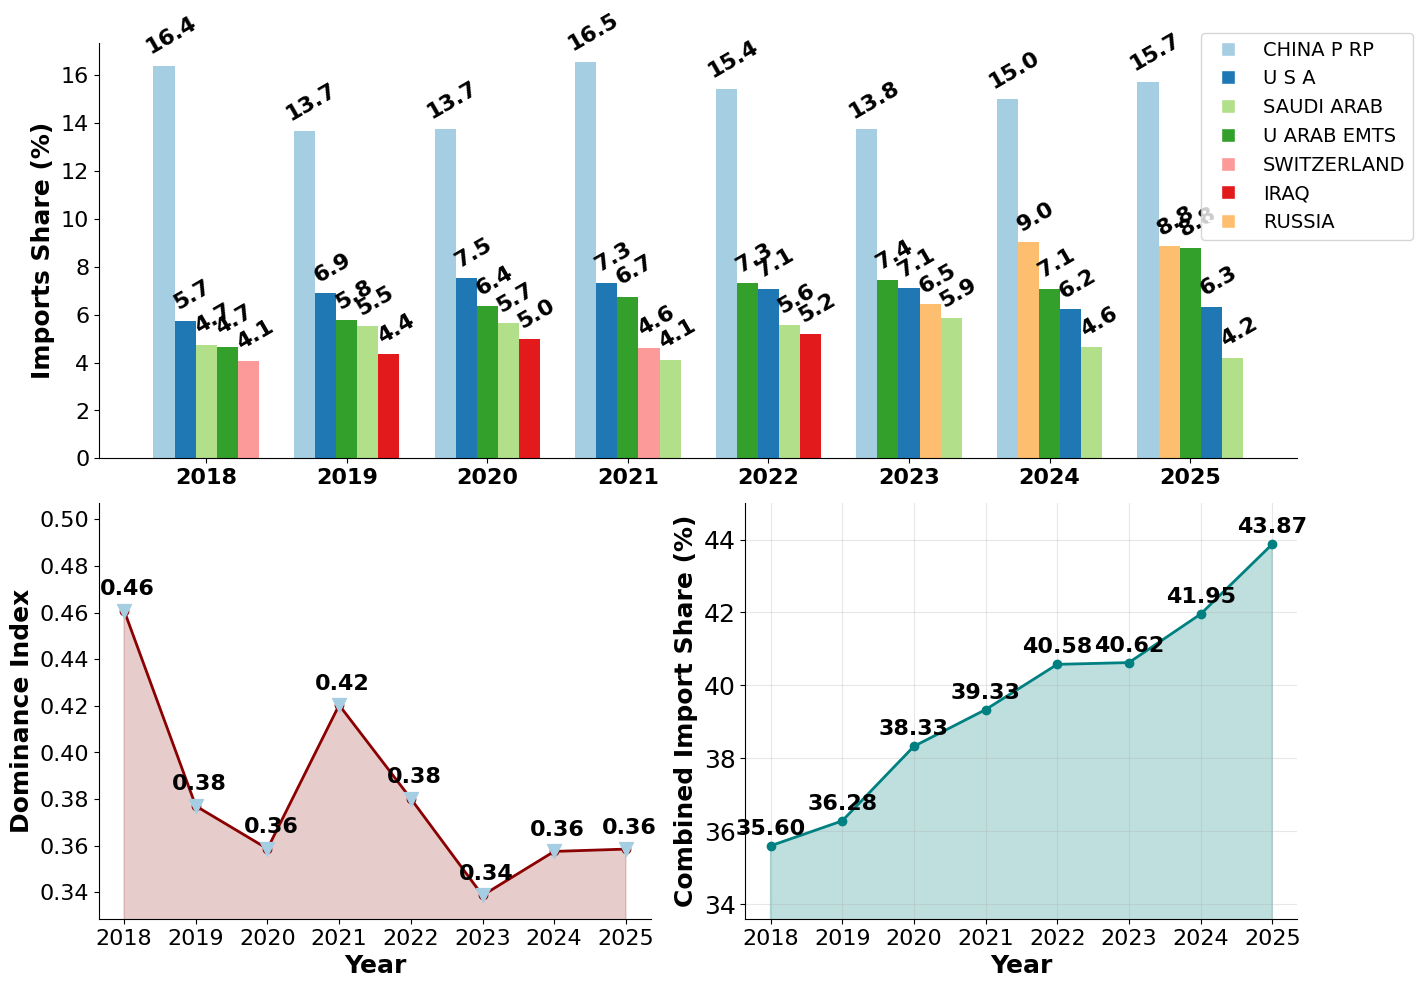

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'countries', 'years', 'top5', and 'dominance_df' are already defined

# Use a consistent color palette
colors = dict(zip(countries, plt.cm.Paired.colors[:len(countries)]))
bar_width = 0.15
x = np.arange(len(years))

# --- Figure setup: 2 rows, 2 columns; top has 1 full-width plot, bottom has 2 side-by-side plots ---
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, :])   # Top full-width plot
ax2 = fig.add_subplot(gs[1, 0])   # Bottom-left plot
ax3 = fig.add_subplot(gs[1, 1])   # Bottom-right plot

# --- Top subplot: Top 5 Shares per Year ---
for idx, year in enumerate(years):
    year_data = top5[top5['Year'] == year]
    year_countries = year_data['Country'].values
    shares = year_data['Share'].values

    for i, (country, share) in enumerate(zip(year_countries, shares)):
        ax1.bar(idx + i * bar_width, share, width=bar_width, color=colors[country])
        ax1.text(idx + i * bar_width + 0.05, share + max(shares) * 0.02, f'{share:.1f}',
                 ha='center', va='bottom', fontsize=16, fontweight='bold', rotation=30, color='black')

ax1.set_ylabel('Imports Share (%)', fontsize=18, fontweight='bold')
ax1.set_xticks(x + bar_width * 2)
ax1.set_xticklabels(years, fontsize=16, fontweight='bold')
ax1.tick_params(axis='y', labelsize=16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Bottom-left subplot: Dominance Index ---
dominance_values = dominance_df['DominanceIndex'].values
dominance_countries = dominance_df['Country'].values
years_idx = np.arange(len(dominance_df.index))

ax2.plot(years_idx, dominance_values, marker='o', color='darkred', linewidth=2, label='Dominance Index')
ax2.fill_between(years_idx, dominance_values, color='darkred', alpha=0.2)

for i, value in enumerate(dominance_values):
    ax2.text(years_idx[i]+0.05, value + 0.005, f'{value:.2f}', ha='center', va='bottom', fontsize=16, fontweight='bold')

for i, country in enumerate(dominance_countries):
    ax2.scatter(years_idx[i], dominance_values[i], color=colors[country], s=100, zorder=3, marker='v')

ax2.set_xlabel('Year', fontsize=18, fontweight='bold')
ax2.set_ylabel('Dominance Index', fontsize=18, fontweight='bold')
ax2.set_xticks(years_idx)
ax2.set_xticklabels([x for x in range(2018, 2026)], fontsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim([min(dominance_values)-0.01, max(dominance_values) * 1.1])  # Added y-limit for better spacing

# --- Bottom-right subplot: Combined Import Share ---
top5_share = top5.groupby('Year').sum().reset_index()
df = top5_share.rename(columns={'Share': 'Combined Import Share (%)'})

ax3.plot(df['Year'], df['Combined Import Share (%)'], marker='o', linestyle='-', color='teal', linewidth=2)
ax3.fill_between(df['Year'], df['Combined Import Share (%)'], color='teal', alpha=0.25)

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('Year', fontsize=18, fontweight='bold')
ax3.set_ylabel('Combined Import Share (%)', fontsize=18, color='black', fontweight='bold')
ax3.set_xticks(df['Year'])
ax3.set_xticklabels(df['Year'], fontsize=16)
ax3.tick_params(axis='y', labelsize=18)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax3.set_ylim([df['Combined Import Share (%)'].min()-2, 45])  # Added y-limit for better spacing


for i, txt in enumerate(df['Combined Import Share (%)']):
    ax3.annotate(f'{txt:.2f}', (df['Year'][i], df['Combined Import Share (%)'][i]),
                 textcoords="offset points", xytext=(0, 8), ha='center', fontsize=16, fontweight='bold')

# --- Shared legend for countries ---
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[c], markersize=10) for c in countries]
fig.legend(handles, countries, title_fontsize=16, fontsize=14,
           loc='upper right', bbox_to_anchor=(1.02, 0.97))

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('images/countryWiseImportShare_Dominance_Combined.png', dpi=1200, bbox_inches='tight')
plt.show()


In [126]:
top5_share

,Year,Country,Unnamed: 0,Value(Imports),Share,Growth
0,2018,CHINA P RPU S ASAUDI ARABU ARAB EMTSSWITZERLAND,8864,165723.85,35.5951,0.00
1,2019,CHINA P RPU S AU ARAB EMTSSAUDI ARABIRAQ,7596,186506.13,36.2798,118.70
2,2020,CHINA P RPU S AU ARAB EMTSSAUDI ARABIRAQ,737,181934.82,38.3254,-4.43
3,2021,CHINA P RPU S AU ARAB EMTSSWITZERLANDSAUDI ARAB,1977,155141.05,39.3323,-63.28
4,2022,CHINA P RPU ARAB EMTSU S ASAUDI ARABIRAQ,3012,248745.75,40.5750,397.50
5,2023,CHINA P RPU ARAB EMTSU S ARUSSIASAUDI ARAB,4227,290849.17,40.6232,431.80
6,2024,CHINA P RPRUSSIAU ARAB EMTSU S ASAUDI ARAB,5365,284532.50,41.9532,-16.46
7,2025,CHINA P RPRUSSIAU ARAB EMTSU S ASAUDI ARAB,6511,316408.11,43.8725,51.88
